In [2]:
import pandas as pd
board_games=pd.read_csv('board_games.csv')
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [3]:
board_games = board_games.dropna(axis=0)

In [4]:
board_games = board_games[board_games['users_rated']> 0]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  488.,   114.,   852.,   379.,  1680.,  1144.,  2825.,  2381.,
         4828.,  3395.,  5715.,  7878.,  6702.,  7147.,  4672.,  3798.,
         1302.,   922.,   199.,   473.]),
 array([  1.  ,   1.45,   1.9 ,   2.35,   2.8 ,   3.25,   3.7 ,   4.15,
          4.6 ,   5.05,   5.5 ,   5.95,   6.4 ,   6.85,   7.3 ,   7.75,
          8.2 ,   8.65,   9.1 ,   9.55,  10.  ]),
 <a list of 20 Patch objects>)

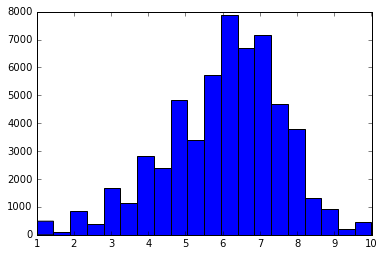

In [6]:
plt.hist(board_games["average_rating"],bins=20)

In [7]:
print(board_games["average_rating"].std())

1.57882993483


In [8]:
print(board_games["average_rating"].mean())

6.01611284933


In [9]:
from sklearn.cluster import KMeans

clus = KMeans(n_clusters=5)

In [10]:
cols = list(board_games.columns)

In [11]:
cols.remove("id")
cols.remove("type")
cols.remove("name")
numeric = board_games[cols]
clus.fit(numeric)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [12]:
import numpy
game_mean = numeric.apply(numpy.mean , axis=1)
game_std = numeric.apply(numpy.std , axis=1)

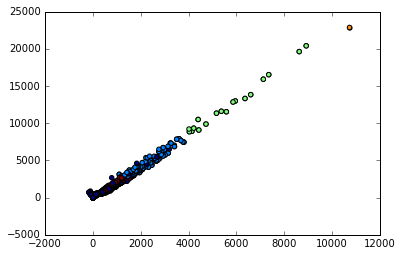

In [13]:
labels = clus.labels_
plt.scatter(x=game_mean,y=game_std , c=labels)

In [14]:
correlations = numeric.corr()
correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(board_games[cols],board_games["average_rating"])
predictions = lr.predict(board_games[cols])
numpy.mean((predictions - board_games["average_rating"])**2)


2.8082280776653264e-28

In [16]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(board_games[cols] , test_size=0.2)

In [17]:
test.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
2259,2011.0,2.0,4.0,30.0,30.0,30.0,14.0,9830,6.89646,6.76849,12868,562,317,1743,2283,686,1.9563
67391,2012.0,2.0,4.0,0.0,0.0,0.0,8.0,1,5.00000,0.00000,3,0,0,1,0,0,0.0000
27578,1976.0,2.0,6.0,0.0,0.0,0.0,0.0,2,4.50000,0.00000,2,0,0,0,1,0,0.0000
10976,1961.0,2.0,2.0,120.0,120.0,120.0,12.0,182,5.54423,5.49414,507,36,3,5,108,30,2.5000
3558,2010.0,2.0,4.0,45.0,45.0,45.0,10.0,1213,6.37393,6.01254,2122,122,112,570,361,98,2.2245
